# Introduction
Below is to calculate concentration of Carbon dioxide, Methane and Methane isotope, which are measured by Picarro isotope analyzer.I design this calculation by myself and complete this coding step by step (The result is satified). In this calculation, I don't show all of the data(please see test 1.csv). Instead, I extract out the required data to calculte CO2, CH4, as what the figures demonstrates.

# Parsing the file headers

In [694]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import math

filename ='test 1.csv'

with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)
        print(header_row)
        

['DATE', 'TIME', 'FRAC_DAYS_SINCE_JAN1', 'FRAC_HRS_SINCE_JAN1', 'EPOCH_TIME', 'ALARM_STATUS', 'INST_STATUS', 'Amb_P', 'CavityPressure', 'CavityTemp', 'WarmBoxTemp', 'EtalonTemp', 'DasTemp', 'MPVPosition', 'solenoid_valves', 'OutletValve', 'MeasurementMode', 'species', 'HP_12CH4', 'HP_12CH4_dry', 'HP_13CH4', 'HR_13CH4', 'Delta_iCH4_Raw', 'HP_Delta_iCH4_Raw', 'HP_Delta_iCH4_30s', 'HP_Delta_iCH4_2min', 'HP_Delta_iCH4_5min', 'HR_12CH4', 'HR_12CH4_dry', 'HR_Delta_iCH4_Raw', 'HR_Delta_iCH4_30s', 'HR_Delta_iCH4_2min', 'HR_Delta_iCH4_5min', 'ChemDetect', 'H2O', '12CO2', '12CO2_dry', '13CO2', 'Delta_Raw_iCO2', 'Delta_30s_iCO2', 'Delta_2min_iCO2', 'Delta_5min_iCO2', 'peak87_baseave_spec', 'peak88_baseave', 'peakheight_5', 'peak0_spec', 'ch4_splinemax', 'peak30_spec', 'peak_30', 'SSIMPressure', 'PPF_res', 'PPF_base_offset', 'PPF_slope_offset', 'PPF_shift', 'PPF_CH4_conc', 'PPF_H2O_conc', 'PPF_C2H6_conc', 'PPF_C2H4_conc', 'PPF_NH3_conc', 'PPF_H2S_conc']


# Printing the headers and their positions

In [695]:
with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)
    
        for index, column_header in enumerate(header_row):  #Find the exact row of 12CO2
            print(index, column_header)
     

0 DATE
1 TIME
2 FRAC_DAYS_SINCE_JAN1
3 FRAC_HRS_SINCE_JAN1
4 EPOCH_TIME
5 ALARM_STATUS
6 INST_STATUS
7 Amb_P
8 CavityPressure
9 CavityTemp
10 WarmBoxTemp
11 EtalonTemp
12 DasTemp
13 MPVPosition
14 solenoid_valves
15 OutletValve
16 MeasurementMode
17 species
18 HP_12CH4
19 HP_12CH4_dry
20 HP_13CH4
21 HR_13CH4
22 Delta_iCH4_Raw
23 HP_Delta_iCH4_Raw
24 HP_Delta_iCH4_30s
25 HP_Delta_iCH4_2min
26 HP_Delta_iCH4_5min
27 HR_12CH4
28 HR_12CH4_dry
29 HR_Delta_iCH4_Raw
30 HR_Delta_iCH4_30s
31 HR_Delta_iCH4_2min
32 HR_Delta_iCH4_5min
33 ChemDetect
34 H2O
35 12CO2
36 12CO2_dry
37 13CO2
38 Delta_Raw_iCO2
39 Delta_30s_iCO2
40 Delta_2min_iCO2
41 Delta_5min_iCO2
42 peak87_baseave_spec
43 peak88_baseave
44 peakheight_5
45 peak0_spec
46 ch4_splinemax
47 peak30_spec
48 peak_30
49 SSIMPressure
50 PPF_res
51 PPF_base_offset
52 PPF_slope_offset
53 PPF_shift
54 PPF_CH4_conc
55 PPF_H2O_conc
56 PPF_C2H6_conc
57 PPF_C2H4_conc
58 PPF_NH3_conc
59 PPF_H2S_conc


# Exactng and reading data

In [696]:
with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)
      
#get the carbon dioxide from file  
        carbon_dioxides, methanes, vars, ich4s =[], [], [], []
        
        for row in reader:   
      
            carbon_dioxide = float(row[35]) 
            carbon_dioxides.append(carbon_dioxide)
            
            methane = float(row[18])
            methanes.append(methane)
            
           # var = float(row[38])
           # vars.append(b)
            
            ich4 =float(row[22])
            ich4s.append(ich4)
            
            
        print(carbon_dioxides)
        print(methanes)
            

[417.0, 417.0, 418.0, 418.0, 418.0, 418.0, 417.0, 417.0, 417.0, 417.0, 418.0, 418.0, 418.0, 418.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 416.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 415.0, 415.0, 415.0, 415.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 414.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 416.0, 416.0, 416.0, 416.0, 417.0, 417.0, 417.0, 417.0, 417.0, 417.0, 417.0, 417.0, 418.0, 418.0, 418.0, 418.0, 417.0, 417.0, 417.0, 417.0, 417.0

# Plotting data and compare two figures

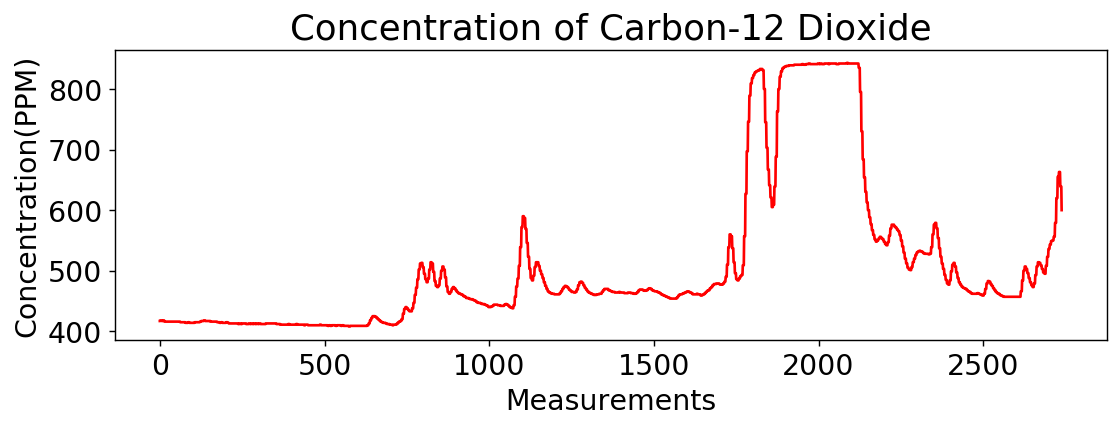

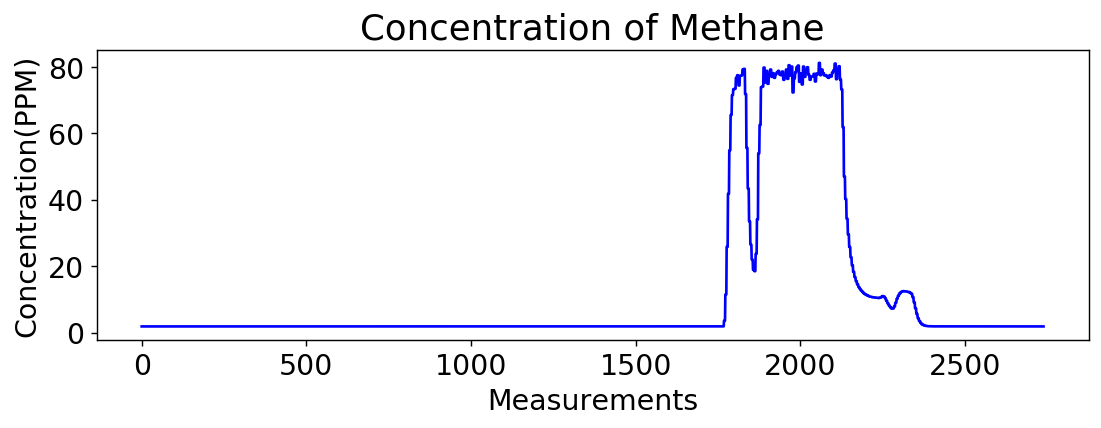

In [697]:
#Plot data
fig = plt.figure(dpi=128, figsize=(10, 3))
plt.plot(carbon_dioxides, c='red')

#Format plot.
plt.title("Concentration of Carbon-12 Dioxide", fontsize=20)
plt.xlabel('Measurements', fontsize=16)
plt.ylabel("Concentration(PPM)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

#Plot data
fig = plt.figure(dpi=128, figsize=(10, 3))
plt.plot(methanes, c='blue')

#Format plot.
plt.title("Concentration of Methane", fontsize=20)
plt.xlabel('Measurements', fontsize=16)
plt.ylabel("Concentration(PPM)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

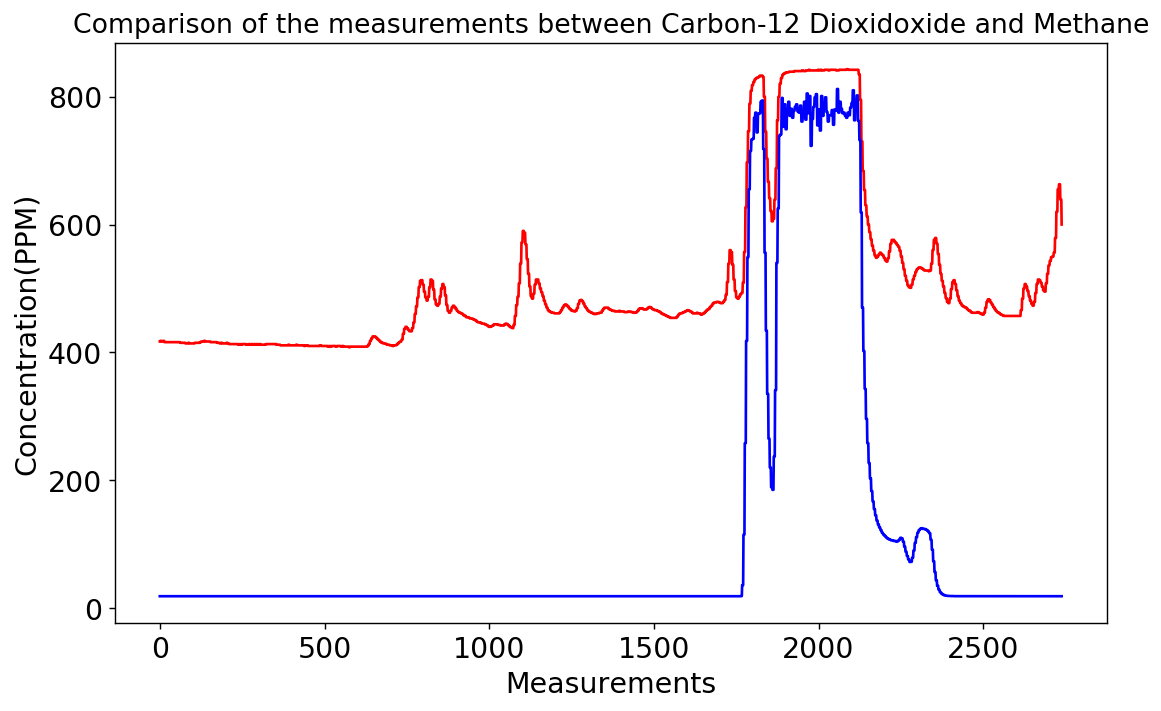

In [681]:
 with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)
      
#get the carbon dioxide from file  
        carbon_dioxides, methanes =[], []
        
        for row in reader:   
      
            carbon_dioxide = float(row[35])
            carbon_dioxides.append(carbon_dioxide)
            
            methane = float(row[18])*10
            methanes.append(methane)
    

#Plot data
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(carbon_dioxides, c='red')
plt.plot(methanes, c='blue')

#Format plot.
plt.title("Comparison of the measurements between Carbon-12 Dioxidoxide and Methane", fontsize=15)
plt.xlabel('Measurements', fontsize=16)
plt.ylabel("Concentration(PPM)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Finding the right points

In [682]:
#Set reference to look for start and end points  
start_index = 2000
end_index = 2000
reference_value = carbon_dioxides[2000]

In [683]:
#look for start points.
while(abs(carbon_dioxides[ start_index-1]-carbon_dioxides[ start_index]) < 20):
      start_index -=1
      print('The start point is:', start_index)

The start point is: 1999
The start point is: 1998
The start point is: 1997
The start point is: 1996
The start point is: 1995
The start point is: 1994
The start point is: 1993
The start point is: 1992
The start point is: 1991
The start point is: 1990
The start point is: 1989
The start point is: 1988
The start point is: 1987
The start point is: 1986
The start point is: 1985
The start point is: 1984
The start point is: 1983
The start point is: 1982
The start point is: 1981
The start point is: 1980
The start point is: 1979
The start point is: 1978
The start point is: 1977
The start point is: 1976
The start point is: 1975
The start point is: 1974
The start point is: 1973
The start point is: 1972
The start point is: 1971
The start point is: 1970
The start point is: 1969
The start point is: 1968
The start point is: 1967
The start point is: 1966
The start point is: 1965
The start point is: 1964
The start point is: 1963
The start point is: 1962
The start point is: 1961
The start point is: 1960


In [684]:
#look for end points.

while(abs(carbon_dioxides[end_index+1]-carbon_dioxides[end_index]) < 26):
    end_index +=1
    print('The end point is:', end_index)
      

The end point is: 2001
The end point is: 2002
The end point is: 2003
The end point is: 2004
The end point is: 2005
The end point is: 2006
The end point is: 2007
The end point is: 2008
The end point is: 2009
The end point is: 2010
The end point is: 2011
The end point is: 2012
The end point is: 2013
The end point is: 2014
The end point is: 2015
The end point is: 2016
The end point is: 2017
The end point is: 2018
The end point is: 2019
The end point is: 2020
The end point is: 2021
The end point is: 2022
The end point is: 2023
The end point is: 2024
The end point is: 2025
The end point is: 2026
The end point is: 2027
The end point is: 2028
The end point is: 2029
The end point is: 2030
The end point is: 2031
The end point is: 2032
The end point is: 2033
The end point is: 2034
The end point is: 2035
The end point is: 2036
The end point is: 2037
The end point is: 2038
The end point is: 2039
The end point is: 2040
The end point is: 2041
The end point is: 2042
The end point is: 2043
The end poi

In [693]:
#slice the lists,to get the right points.
list_co2 = carbon_dioxides[1883:2126]
list_methane = methanes[1883:2126]
list_var = vars[1883:2126]
list_ich4 = ich4s[1883:2126]
df = pd.DataFrame({"concentration of CO2(PPM)":list_co2, 
                   "concentration of CH4(PPM)":list_methane,  
                   "isotop of CH4(per mil)":list_ich4,})
df

,concentration of CO2(PPM),concentration of CH4(PPM),isotop of CH4(per mil)
0,820.0,73.9,-80.80
1,820.0,74.1,-34.60
2,820.0,74.1,-34.60
3,829.0,74.1,-34.60
4,829.0,74.1,-34.60
5,829.0,79.8,-88.60
6,829.0,79.8,-88.60
7,834.0,79.8,-88.60
8,834.0,79.8,-88.60
9,834.0,75.3,-20.40


# Result: concentrations

In [688]:
#calculate the average of concencentration and get the concentration
df.mean(axis = 0) 

concentration of CO2(PPM)    840.263374
concentration of CH4(PPM)    776.901235
isotop of CH4(per mil)       -46.957860
dtype: float64